In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tf-nightly-gpu-2.0-preview
import tensorflow_datasets as tfds
import tensorflow as tf

In [0]:
import matplotlib.pyplot as plt

#建立Plot的Def供畫圖用
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [0]:
#讀取資料
#使用TFDS(Google開源數據集)來下載IMDB資料，這個二元分類資料裡面有正負情緒資料
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
#這個info生成器可以傳遞字串並標記
tokenizer = info.features['text'].encoder

In [0]:
#print ('Vocabulary size: {}'.format(tokenizer.vocab_size))

In [0]:
sample_string = 'TensorFlow is cool.'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

assert original_string == sample_string

Tokenized string is [6307, 2327, 4043, 4265, 9, 2724, 7975]
The original string: TensorFlow is cool.


In [0]:
#透過tokenizer.decode，可以字串進行編碼
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
4265 ----> ow 
9 ----> is 
2724 ----> cool
7975 ----> .


In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE) #會預留在記憶體中，共有BUFFER_SIZE大小的緩衝儲存區
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes) #將內容依據BUFFER_SIZE大小進行填充
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [0]:
tokenizer.vocab_size #電影評論中的詞彙表Size

NameError: ignored

In [0]:
#Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64), #第一層一樣先做Embedding，效果比One-hot效果好
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), #透過一層RNN來包一個LSTM，其中64為單位的維度，因為Embedding也是64
    tf.keras.layers.Dense(64, activation='relu'), #先做一層Relu，讓數據範圍控制在Relu範圍
    tf.keras.layers.Dense(1, activation='sigmoid') #再做一層sigmoid做機率輸出
])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
#Train the model
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 92s 236ms/step - loss: 0.2532 - accuracy: 0.8999 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 89s 228ms/step - loss: 0.1707 - accuracy: 0.9372 - val_loss: 0.5009 - val_accuracy: 0.8217
Epoch 3/10
391/391 [==============================] - 82s 209ms/step - loss: 0.2649 - accuracy: 0.8924 - val_loss: 0.6329 - val_accuracy: 0.6826
Epoch 4/10
391/391 [==============================] - 81s 207ms/step - loss: 0.3334 - accuracy: 0.8597 - val_loss: 0.6270 - val_accuracy: 0.7154
Epoch 5/10
391/391 [==============================] - 81s 206ms/step - loss: 0.4800 - accuracy: 0.7705 - val_loss: 0.6250 - val_accuracy: 0.6452
Epoch 6/10
391/391 [==============================] - 79s 203ms/step - loss: 0.3506 - accuracy: 0.8500 - val_loss: 0.5505 - val_accuracy: 0.7710
Epoch 7/10
391/391 [==============================] - 79s 201ms/step - loss: 0.1708 - accuracy: 0.9368 - val_loss: 0.5581 

In [0]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

    391/Unknown - 89s 228ms/step - loss: 0.6931 - accuracy: 0.5160Test Loss: 0.693051710762941
Test Accuracy: 0.516040027141571


In [0]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [0]:
def sample_predict(sentence, pad):
  tokenized_sample_pred_text = tokenizer.encode(sample_pred_text)

  if pad:
    tokenized_sample_pred_text = pad_to_size(tokenized_sample_pred_text, 64)

  predictions = model.predict(tf.expand_dims(tokenized_sample_pred_text, 0))

  return (predictions)

In [0]:
# 預測大於等於0.5為正面情緒，否則為負面情緒

In [0]:
# 沒有padding資料的預測
#sample_pred_text = ('The movie was cool. The animation and the graphics '
#                    'were out of this world. I would recommend this movie.')
#predictions = sample_predict(sample_pred_text, pad=False)
#print (predictions)


[[0.5007024]]


In [0]:
# 有padding的資料來做預測，以64的長度來做填補，避免過度配適的問題

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.5000184]]


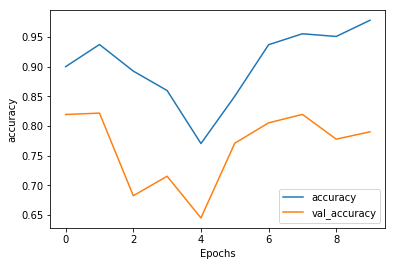

In [0]:
plot_graphs(history, 'accuracy')

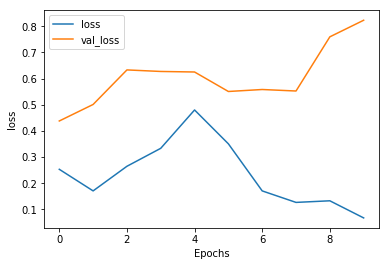

In [0]:
plot_graphs(history, 'loss')

## Stack two or more LSTM layers

Keras recurrent layers have two available modes that are controlled by the `return_sequences` constructor argument:

* Return either the full sequences of successive outputs for each timestep (a 3D tensor of shape `(batch_size, timesteps, output_features)`).
* Return only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)).

In [0]:
#透過RNN包一層LSTM不夠，需要再推疊多個LSTM，提升準確度，就需要靠return_sequences將參數堆疊到另一個LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset)

NameError: ignored

In [0]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

NameError: ignored

In [0]:
# 沒有padding資料的預測

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

NameError: ignored

In [0]:
# 有padding的資料來做預測，以64的長度來做填補，避免過度配適的問題

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

NameError: ignored

In [0]:
plot_graphs(history, 'accuracy')

In [0]:
plot_graphs(history, 'loss')